<h1><center>Comprehensive Basic Titanic Data Tutorial</center></h1>

<h1>Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#one"><span class="number">1.</span> Introduction</a></li>
            <ul>
                <li><a href="#one-one"><span class="number">1.1</span> Downloading Dataset</a></li>
                <li><a href="#one-two"><span class="number">1.2</span> First Look</a></li>
        </ul>
        <li><a href="#two"><span class="number">2.</span> Feature Preprocessing</a></li>
            <ul>
                <li><a href="#two-one"><span class="number">2.1</span> Categorical and Ordinal Features</a></li>
                <li><a href="#two-two"><span class="number">2.2</span> Numeric Values</a></li>
                <li><a href="#two-three"><span class="number">2.3</span> Handling Missing Values</a></li>
                <li><a href="#two-four"><span class="number">2.4</span> Feature Generation</a></li>
            </ul>
        <li><a href="#pre-processing"><span class="number">3.</span> Pre-processing</a></li>
        <li><a href="#setting_up_tree"><span class="number">4.</span> Setting up the Decision Tree</a></li>
        <li><a href="#modeling"><span class="number">5.</span> Modeling</a></li>
        <li><a href="#prediction"><span class="number">6.</span> Prediction</a></li>
        <li><a href="#evaluation"><span class="number">7.</span> Evaluation</a></li>
        <li><a href="#visualization"><span class="number">8.</span> Visualization</a></li>
    </ul>
</div>


<h2 id="one">1. Introduction</h2>

This notebook is a very basic and simple introductory primer to the method of ensembling (combining) base learning models, in particular the variant of ensembling known as Stacking. In a nutshell stacking uses as a first-level (base), the predictions of a few basic classifiers and then uses another model at the second-level to predict the output from the earlier first-level predictions.

The Titanic dataset is a prime candidate for introducing this concept as many newcomers to Kaggle start out here. Furthermore even though stacking has been responsible for many a team winning Kaggle competitions there seems to be a dearth of kernels on this topic so I hope this notebook can fill somewhat of that void.

I myself am quite a newcomer to the Kaggle scene as well and the first proper ensembling/stacking script that I managed to chance upon and study was one written in the AllState Severity Claims competition by the great Faron. The material in this notebook borrows heavily from Faron's script although ported to factor in ensembles of classifiers whilst his was ensembles of regressors. Anyway please check out his script here:

Stacking Starter : by Faron

Now onto the notebook at hand and I hope that it manages to do justice and convey the concept of ensembling in an intuitive and concise manner. My other standalone Kaggle script which implements exactly the same ensembling steps (albeit with different parameters) discussed below gives a Public LB score of 0.808 which is good enough to get to the top 9% and runs just under 4 minutes. Therefore I am pretty sure there is a lot of room to improve and add on to that script. Anyways please feel free to leave me any comments with regards to how I can improve

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

<div id="one-one">
    <h3>1.1. Downloading Dataset</h3>
    <br>
    Import the Following Libraries:
<ul>
    <li> <b>numpy</b> </li>
    <li> <b>pandas</b> </li>
</ul>

</div>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





#import itertools
#from matplotlib.ticker import NullFormatter
#import matplotlib.ticker as ticker
#from sklearn import preprocessing
#from sklearn.preprocessing import PolynomialFeatures

In [4]:
def load_data():
    train=pd.read_csv('datasets/train.csv')
    test=pd.read_csv('datasets/test.csv')
    return train, test

In [5]:
train, test = load_data()

<div id="one-two">
    <h3>1.2. First Look</h3>
</div>

In [6]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [111]:
combine=[train,test]
result = pd.concat(combine, ignore_index=True, sort=False)

In [112]:
result.describe(include=['int64','float64','object'],percentiles = [0.025,0.975])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
2.5%,33.700000,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,NaN,6.966875,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
97.5%,1276.300000,1.000000,3.000000,NaN,NaN,61.875000,4.000000,2.000000,NaN,211.500000,NaN,NaN


In [119]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
female1        1309 non-null uint8
male1          1309 non-null uint8
female2        1309 non-null uint8
male2          1309 non-null uint8
female3        1309 non-null uint8
male3          1309 non-null uint8
Emb__C         1309 non-null uint8
Emb__Q         1309 non-null uint8
Emb__S         1309 non-null uint8
dtypes: float64(3), int64(4), object(5), uint8(9)
memory usage: 134.3+ KB


In [114]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
result_v1= result.select_dtypes(include=numerics)

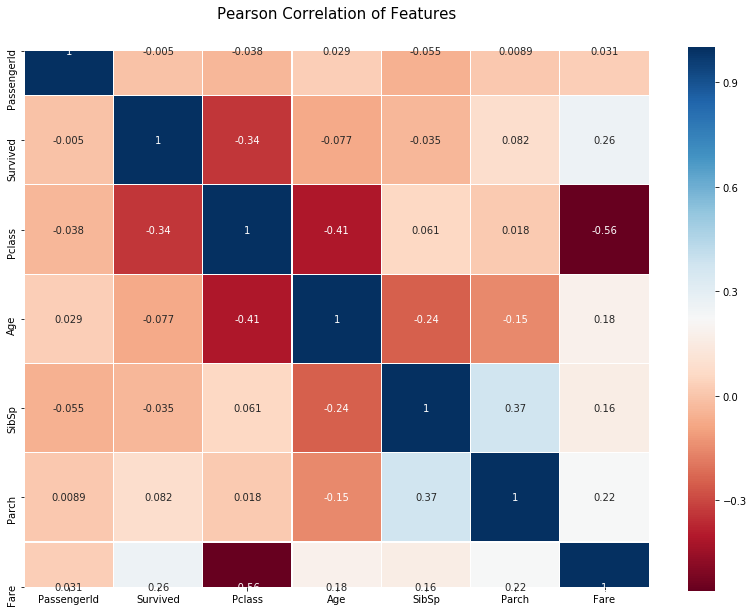

In [115]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(result_v1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [118]:
df_embarked=pd.get_dummies(result['Embarked'],prefix='Emb_')
result=pd.concat([result, df_embarked], axis=1, sort=False)

In [ ]:
df_sex=pd.get_dummies(result['Pclass'],prefix='Pclass')
df_class =pd.get_dummies(result['Sex'])
df_sex_class = pd.concat([df_class.mul(col,axis='rows').add_suffix(i[-1]) for i,col in df_sex.items()],axis=1)
result=pd.concat([result, df_sex_class], axis=1, sort=False)

In [121]:
result['numoffam']=result['SibSp']+result['Parch']+1

In [125]:
result['Title'] = result.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
result['Miss']=(result['Title']=='Miss').astype(int)
result['Mrs']=(result['Title']=='Mrs').astype(int)
result['Mr']=(result['Title']=='Mr').astype(int)
result['Rare']=(result['Title']=='Rare').astype(int)

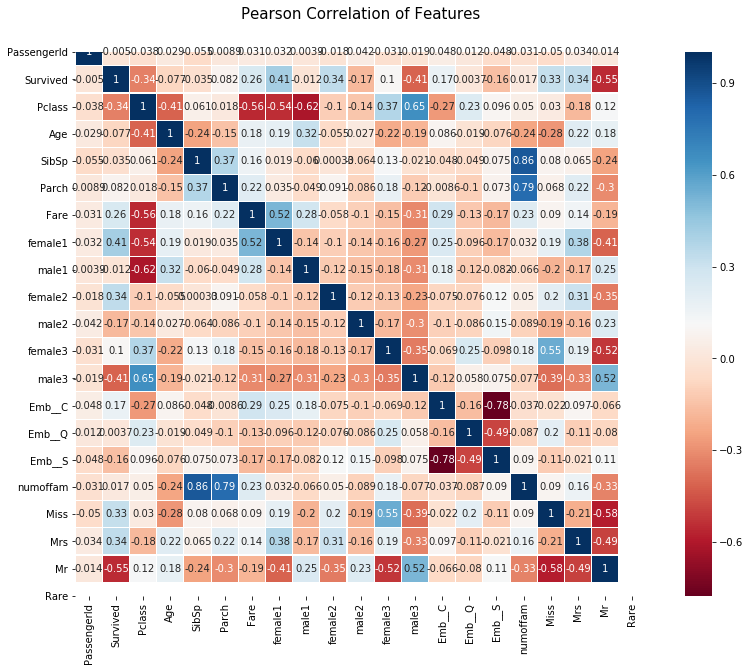

In [126]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
result_v2= result.select_dtypes(include=numerics)
colormap = plt.cm.RdBu
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(result_v2.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [127]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
result_v1= result.select_dtypes(include=numerics)
result_v2 = result_v1[result['Survived'].notnull()]
result_v2 = result_v2[result['Fare'].notnull()]

/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [128]:
y = result_v2['Survived'].values
X = np.asanyarray(result_v2[['Pclass' ,'SibSp','Parch']])#,'Parch','Fare']])

In [129]:
from sklearn import preprocessing
X_v1 = preprocessing.StandardScaler().fit(X).transform(X)

In [130]:
poly = PolynomialFeatures(degree=1)
X_v1 = poly.fit_transform(X_v1)
X_v1

array([[ 1.        ,  0.82737724,  0.43279337, -0.47367361],
       [ 1.        , -1.56610693,  0.43279337, -0.47367361],
       [ 1.        ,  0.82737724, -0.4745452 , -0.47367361],
       ...,
       [ 1.        ,  0.82737724,  0.43279337,  2.00893337],
       [ 1.        , -1.56610693, -0.4745452 , -0.47367361],
       [ 1.        ,  0.82737724, -0.4745452 , -0.47367361]])

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_v1, y, test_size=0.2, random_state=4)

In [132]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
y_hat1 = regr.predict(X_train)
y_hat2 = regr.predict(X_test)

In [134]:
print(1 - (sum((y_hat1 - y_train) ** 2) / sum((y_train - np.mean(y_train)) ** 2)))
print(1 - (sum((y_hat2 - y_test) ** 2) / sum((y_test - np.mean(y_test)) ** 2)))

0.11639325293689251
0.14438267658532777


In [107]:
result['Age'].mean()

22.069266615737202

In [108]:
avgage=result['Age'].mean()
agestd=result['Age'].std() 
age_values=np.random.randint(avgage-agestd,avgage+agestd,size=result['Age'].isnull().sum())
result['Age'][np.isnan(result['Age'])]=age_values

/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<h2 id="two">2. Feature Proprocessing</h2>

<div id="two-two">
    <h3>2.2. Categorical and Ordinal Features</h3>
</div>

<div id="two-two-one">
    <h4>2.2.1 Sex and Pclass</h3>
</div>

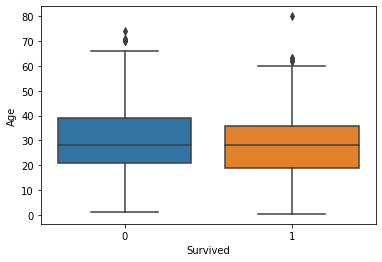

In [18]:
sns.boxplot(x = 'Survived', y = 'Age', data=train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a168a3c90>]],
      dtype=object)

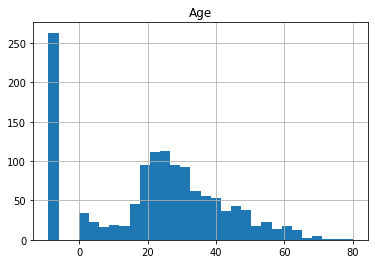

In [37]:
result['Age'] = result['Age'].fillna(-9)
result.hist(column='Age', bins=30)

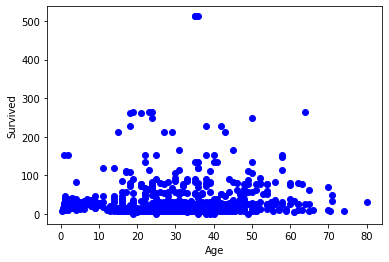

In [38]:
plt.scatter(train.Age, train.Fare,  color='blue')
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In [49]:
np.sort(result['Age'].unique())

array([-9.  ,  0.17,  0.33,  0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,
        2.  ,  3.  ,  4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  ,
       11.  , 11.5 , 12.  , 13.  , 14.  , 14.5 , 15.  , 16.  , 17.  ,
       18.  , 18.5 , 19.  , 20.  , 20.5 , 21.  , 22.  , 22.5 , 23.  ,
       23.5 , 24.  , 24.5 , 25.  , 26.  , 26.5 , 27.  , 28.  , 28.5 ,
       29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  , 34.  , 34.5 ,
       35.  , 36.  , 36.5 , 37.  , 38.  , 38.5 , 39.  , 40.  , 40.5 ,
       41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  , 48.  ,
       49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 , 56.  ,
       57.  , 58.  , 59.  , 60.  , 60.5 , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 67.  , 70.  , 70.5 , 71.  , 74.  , 76.  , 80.  ])

In [50]:
bins=list(np.sort(result['Age'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
AgeBand        1046 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [123]:
result['AgeBand'] = pd.cut(result['Age'], bins=bins, right=True)
result[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-9.0, 0.17]",NaN
1,"(0.17, 0.33]",NaN
2,"(0.33, 0.42]",1.0
3,"(0.42, 0.67]",1.0
4,"(0.67, 0.75]",1.0
...,...,...
93,"(70.0, 70.5]",0.0
94,"(70.5, 71.0]",0.0
95,"(71.0, 74.0]",0.0
96,"(74.0, 76.0]",NaN


In [43]:
result['AgeBand'] = result['AgeBand'].astype('object')

In [63]:
df_anova.groupby(['AgeBand']

TypeError: unhashable type: 'slice'

In [50]:
from scipy import stats

df_anova = result [['AgeBand','Survived']]
grouped_anova_df = df_anova.groupby(['AgeBand'])
anova_result=stats.f_oneway(grouped_anova_df.get_group("(34.0, 35.0]")['Survived']
                            ,grouped_anova_df.get_group('(79.0, 80.0]')['Survived'])

KeyError: '(34.0, 35.0]'

In [218]:
pd.crosstab(result['Survived'],result['Age'])

Age,-9.00,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0.0,125,0,0,0,0,0,2,7,1,3,...,2,0,2,3,1,2,1,2,1,0
1.0,52,1,1,2,2,1,5,3,5,7,...,2,2,0,0,0,0,0,0,0,1


In [174]:
result['numoffam']=result['SibSp']+result['Parch']+1

In [183]:
result['kid']=(result['Parch']>2)*1

In [199]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
result_1= result.select_dtypes(include=numerics)
result_1.values

array([[1.000e+00, 0.000e+00, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 1.000e+00, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.307e+03,       nan, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.308e+03,       nan, 3.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.309e+03,       nan, 3.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [187]:

pd.crosstab(result['Title'], result['Survived'])
#pd.crosstab(result['Age'], result['Survived'])
#pd.crosstab(result['Survived'], result['Age'])

Survived,0.0,1.0
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


In [188]:
result['Title'] = result['Title'].replace(['Col','Dr', 'Rev', 'Dona'], 'Rare')
result['Title'] = result['Title'].replace('Mlle', 'Miss')
result['Title'] = result['Title'].replace('Ms', 'Miss')
result['Title'] = result['Title'].replace('Mme', 'Mrs')
    

In [189]:
pd.crosstab(result['Title'], result['Survived'])

Survived,0.0,1.0
Title,,
Capt,1,0
Countess,0,1
Don,1,0
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,130
Mr,436,81


In [190]:
result['Title'] = result.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
result['Miss']=(result['Title']=='Miss').astype(int)
result['Mrs']=(result['Title']=='Mrs').astype(int)
result['Mr']=(result['Title']=='Mr').astype(int)
result['Rare']=(result['Title']=='Rare').astype(int)

In [191]:
pd.crosstab(result['Survived'], [result['SibSp'],result['Sex']])
pd.crosstab(result['SibSp'], [result['Age'],result['Survived']])

Age      0.42  0.67  0.75  0.83  0.92  1.00      2.00      3.00   ... 62.00  \
Survived   1.0   1.0   1.0   1.0   1.0   0.0 1.0   0.0 1.0   0.0  ...   1.0   
SibSp                                                             ...         
0            1     0     0     1     0     0   2     1   1     0  ...     2   
1            0     1     0     1     1     0   2     1   2     0  ...     0   
2            0     0     2     0     0     0   1     0   0     0  ...     0   
3            0     0     0     0     0     0   0     2   0     1  ...     0   
4            0     0     0     0     0     1   0     3   0     0  ...     0   
5            0     0     0     0     0     1   0     0   0     0  ...     0   

Age      63.00 64.00 65.00 66.00 70.00 70.50 71.00 74.00 80.00  
Survived   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  
SibSp                                                           
0            1     1     3     1     1     1     2     1     1  
1            1     1     0     0     1     0     0     0     0  
2            0     0     0     0     0     0     0     0     0  
3            0     0     0     0     0     0     0     0     0  
4            0     0     0     0     0     0     0     0     0  
5            0     0     0     0     0     0     0     0     0  

[6 rows x 142 columns]

In [16]:
result.Name

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [17]:
result['Surname']=result.Name.str.extract('([A-Za-z]+),', expand=False)

In [18]:
result.groupby('Surname')['PassengerId'].nunique()

Surname
Abbing         1
Abbott         3
Abelseth       2
Abelson        2
Abrahamsson    1
              ..
Yrois          1
Zabour         2
Zakarian       2
Zimmerman      1
hoef           1
Name: PassengerId, Length: 872, dtype: int64

In [19]:
pd.crosstab(result['Parch'], result['Age'])

Age,0.17,0.33,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,...,64.00,65.00,66.00,67.00,70.00,70.50,71.00,74.00,76.00,80.00
Parch,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,1,1,2,1,1,1
1,0,0,1,1,3,2,0,5,9,5,...,1,1,0,0,1,0,0,0,0,0
2,1,1,0,0,0,1,2,5,3,2,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
result['IsAlone']=((result.Parch == 0) & (result.SibSp == 0)).astype(int)

In [21]:
del result['Cabin']
result = result.dropna()

In [22]:
result.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,IsFemale,Miss,Mrs,Mr,Rare,IsAlone
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.258427,0.242978,0.363764,0.207865,0.151685,0.558989,0.019663,0.564607
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.438078,0.429183,0.481420,0.406065,0.358968,0.496857,0.138937,0.496157
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [259]:
X = result[['Age', 'SibSp','Parch','Fare','Pclass_1','Pclass_2','IsFemale','Mrs','Mr','Rare','IsAlone']] .values  #.astype(float)
X[0:5]

poly = PolynomialFeatures(degree=2)
Xp = poly.fit_transform(X)
Xp

array([[ 1., 22.,  1., ...,  0.,  0.,  0.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  0.,  0.,  1.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [260]:
y = result['Survived'].values

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (604, 11) (604,)
Test set: (68, 11) (68,)


# K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [28]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0., 0., 0., 0., 0.])

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7703125
Test set Accuracy:  0.6666666666666666


In [30]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63888889, 0.58333333, 0.65277778, 0.68055556, 0.72222222,
       0.69444444, 0.66666667, 0.66666667, 0.66666667])

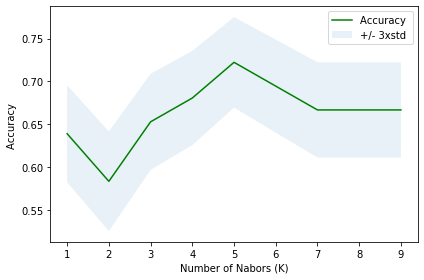

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7222222222222222 with k= 5


# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier



In [34]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
pt = dt.predict(X_test)

In [37]:
print(pt[:5])
print(y_test[:5])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print(accuracy_score(y_test,pt))

0.8055555555555556


In [40]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict 
    dt=DecisionTreeClassifier(criterion='entropy', max_depth=n)
    dt.fit(X_train,y_train)
    pt = dt.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pt)

    
    std_acc[n-1]=np.std(pt==y_test)/np.sqrt(pt.shape[0])

mean_acc

array([0.73611111, 0.73611111, 0.70833333, 0.80555556, 0.79166667,
       0.80555556, 0.80555556, 0.77777778, 0.77777778])

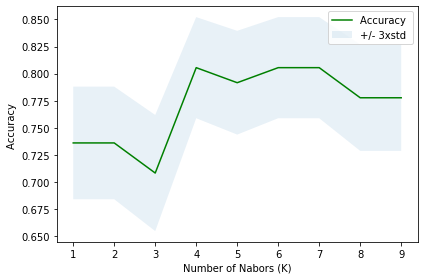

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8055555555555556 with k= 4


In [43]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [44]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

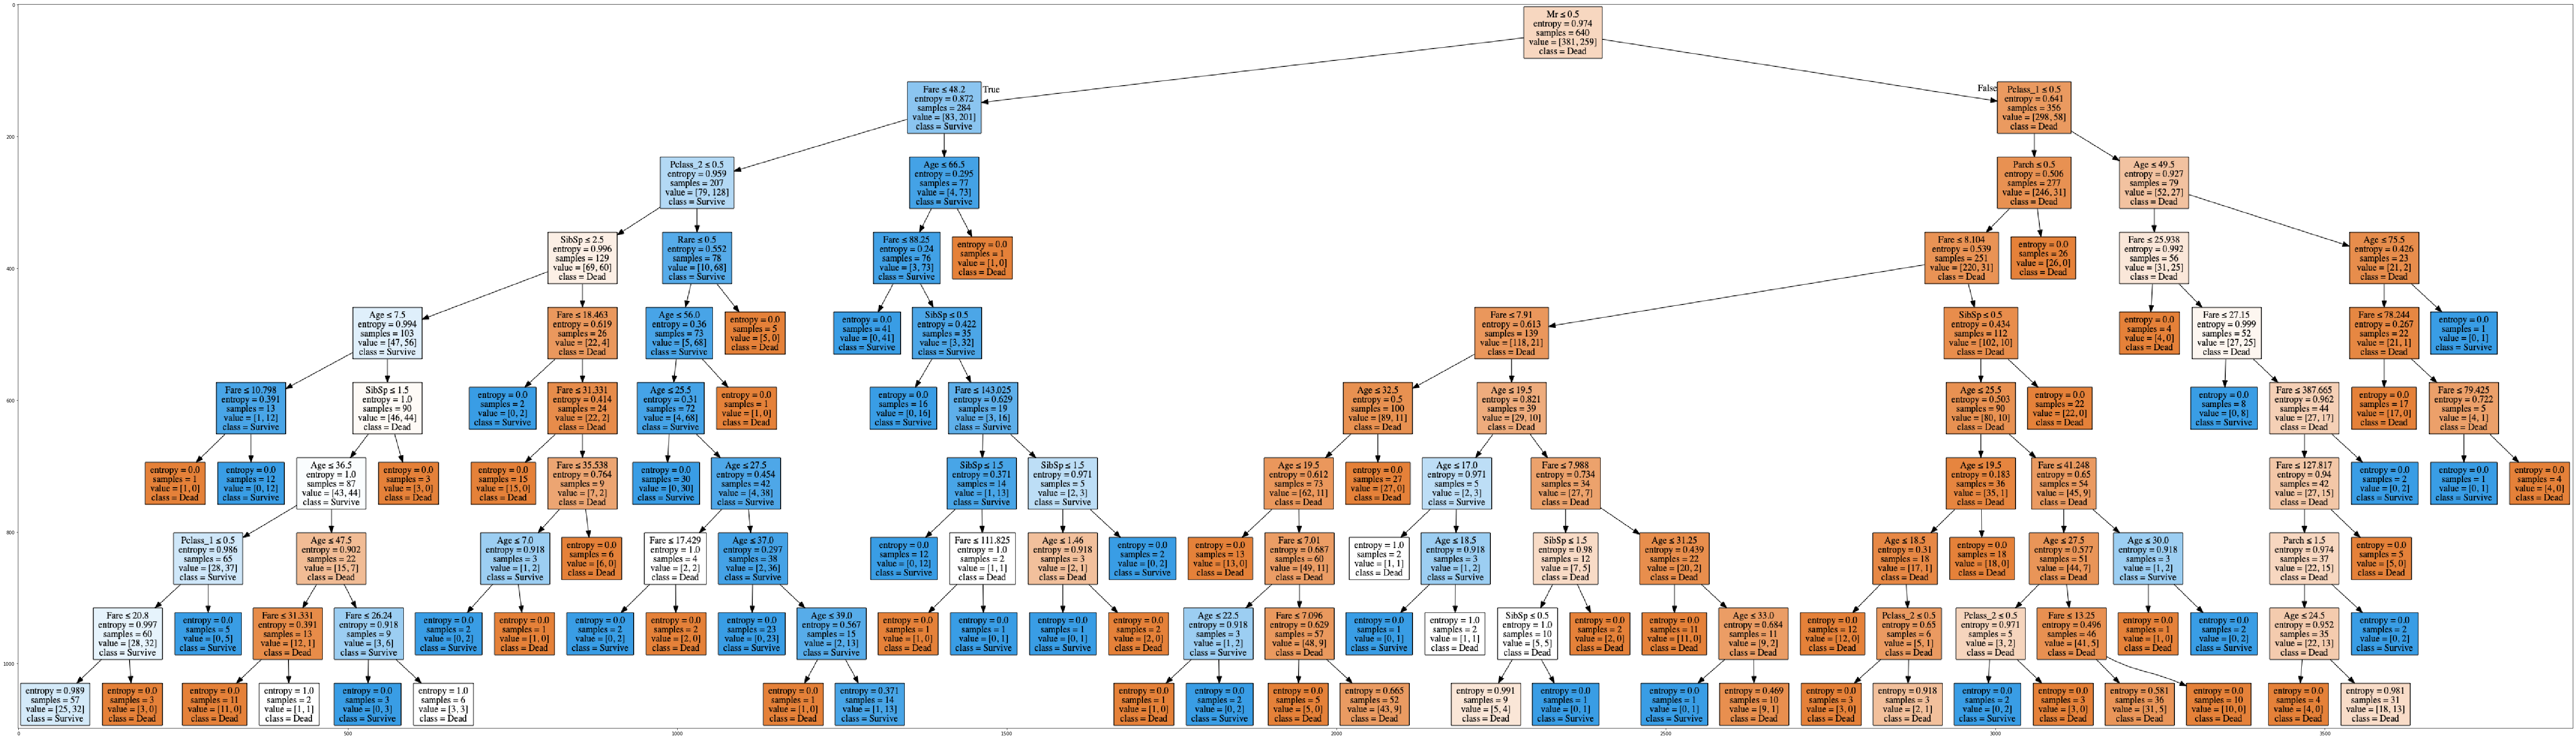

In [45]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = result[['Age', 'SibSp','Parch','Fare','Pclass_1','Pclass_2','IsFemale','Mrs','Mr','Rare','IsAlone']].columns
targetNames = result["Survived"].unique().tolist()
out=tree.export_graphviz(dt,feature_names=featureNames, out_file=dot_data, class_names= ['Dead','Survive'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Logistic Regression

In [46]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Lets build our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

In [263]:
from sklearn import preprocessing
X_normalized = preprocessing.StandardScaler().fit(X).transform(X)
X_normalized[0:5]
# X= preprocessing.StandardScaler().fit(X).transform(X)

array([[-0.5 ,  0.54, -0.53, -0.65, -0.57, -0.57, -0.75, -0.41,  0.85,
         0.  , -1.17],
       [ 0.61,  0.54, -0.53,  1.27,  1.77, -0.57,  1.34,  2.43, -1.18,
         0.  , -1.17],
       [-0.22, -0.54, -0.53, -0.63, -0.57, -0.57,  1.34, -0.41, -1.18,
         0.  ,  0.85],
       [ 0.4 ,  0.54, -0.53,  0.72,  1.77, -0.57,  1.34,  2.43, -1.18,
         0.  , -1.17],
       [ 0.4 , -0.54, -0.53, -0.62, -0.57, -0.57, -0.75, -0.41,  0.85,
         0.  ,  0.85]])

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_normalized, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 11) (537,)
Test set: (135, 11) (135,)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we can predict using our test set:

In [50]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1.])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [51]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.7242489 , 0.2757511 ],
       [0.81052429, 0.18947571],
       [0.29214477, 0.70785523],
       [0.79567404, 0.20432596],
       [0.75711632, 0.24288368],
       [0.30631723, 0.69368277],
       [0.76552353, 0.23447647],
       [0.77221155, 0.22778845],
       [0.17460083, 0.82539917],
       [0.77960625, 0.22039375],
       [0.61102831, 0.38897169],
       [0.26942454, 0.73057546],
       [0.55608047, 0.44391953],
       [0.76256817, 0.23743183],
       [0.74435849, 0.25564151],
       [0.64863069, 0.35136931],
       [0.62508146, 0.37491854],
       [0.71273478, 0.28726522],
       [0.76654898, 0.23345102],
       [0.73519636, 0.26480364],
       [0.73209256, 0.26790744],
       [0.77465968, 0.22534032],
       [0.6208388 , 0.3791612 ],
       [0.20804281, 0.79195719],
       [0.69651468, 0.30348532],
       [0.36084993, 0.63915007],
       [0.59395018, 0.40604982],
       [0.77475916, 0.22524084],
       [0.75529671, 0.24470329],
       [0.33532557, 0.66467443],
       [0.

# <h2 id="evaluation">Evaluation</h2>

### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [52]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7972027972027972

### confusion matrix
Another way of looking at accuracy of classifier is to look at __confusion matrix__.

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[39 17]
 [12 75]]


Confusion matrix, without normalization
[[39 17]
 [12 75]]


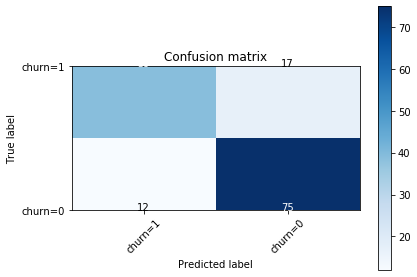

In [54]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Look at first row. The first row is for passengers who survived in test set is 1.
As you can calculate, out of 143 passengers, survived ones are 56 of them is 1. 
And out of these 56, the classifier correctly predicted 39 of them as 1, and 17 of them as 0. 

It means, for 39 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 17 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with non-survived 0? Lets look at the second row.
It looks like  there were 87 customers whom their churn value were 0. 


The classifier correctly predicted 75 of them as 0, and 12 of them wrongly as 1. So, it has done a good job in predicting the passengers with value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives. 

In [55]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84        87
         1.0       0.76      0.70      0.73        56

    accuracy                           0.80       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.80      0.80      0.80       143



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Now, lets try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 



In [56]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47072342438205067

<h2 id="practice">Practice</h2>
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

<h1 align=center><font size="5"> SVM (Support Vector Machines)</font></h1>

In this notebook, you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Lets look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

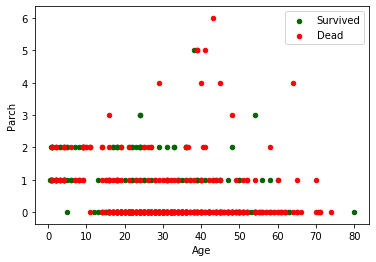

In [57]:
ax = result[result['Survived'] == 1].plot(kind='scatter', x='Age', y='Parch', color='DarkGreen', label='Survived');
result[result['Survived'] == 0].plot(kind='scatter', x='Age', y='Parch', color='Red', label='Dead', ax=ax);
plt.show()

In [58]:
result.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Pclass_1         int64
Pclass_2         int64
IsFemale         int64
Title           object
Miss             int64
Mrs              int64
Mr               int64
Rare             int64
Surname         object
IsAlone          int64
dtype: object

<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [59]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(X_train, y_train) 

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [60]:
yhat = clf.predict(X_test)
print(yhat [0:5])
print(y_test[0:5])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]


              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86        87
         1.0       0.80      0.71      0.75        56

    accuracy                           0.82       143
   macro avg       0.81      0.80      0.81       143
weighted avg       0.82      0.82      0.82       143

Confusion matrix, without normalization
[[40 16]
 [10 77]]


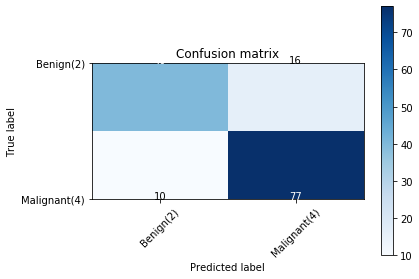

In [61]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [62]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8160663236134935

In [63]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8181818181818182

kernelstring, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

<h1><center>K-Means Clustering</center></h1>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

In [64]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>
Lets create our own dataset for this lab!

First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>

In [65]:
np.random.seed(0)

In [66]:
X

array([[22.,  1.,  0., ...,  1.,  0.,  0.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [19.,  0.,  0., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  1.],
       [32.,  0.,  0., ...,  1.,  0.,  1.]])

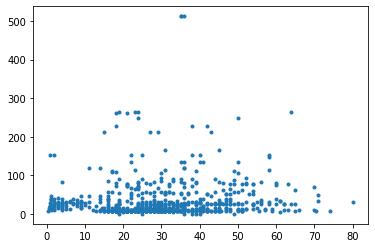

In [67]:
plt.scatter(X[:, 0], X[:, 3], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [68]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, X

In [69]:
k_means.fit(result[['Age','Fare']].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [71]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 29.5 ,  25.25],
       [ 32.5 , 220.27]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!
Please read through the code and comments to understand how to plot the model.

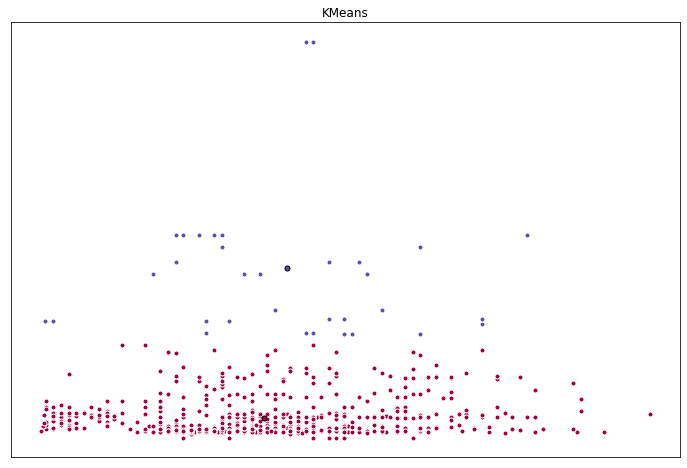

In [72]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(12, 8))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(2), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(result[['Age','Fare']].values[my_members, 0]
            , result[['Age','Fare']].values[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=5)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [73]:
[[4,4], [-2, -1], [2, -3], [1, 1]]

[[4, 4], [-2, -1], [2, -3], [1, 1]]

# <center>Density-Based Clustering</center>

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision. 

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.



In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

Import the following libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Remember <b> %matplotlib inline </b> to display plots

In [74]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Data generation
The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [75]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [76]:
X
Xt = StandardScaler().fit_transform(X)

In [77]:
epsilon = 3
minimumSamples = 15
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Xt)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [78]:
set(labels)

{-1, 0}

In [79]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,

In [80]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [256]:
result[core_samples_mask]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_1,Pclass_2,IsFemale,Title,Miss,Mrs,Mr,Rare,Surname,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,Mr,0,0,1,0,Braund,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,1,Mrs,0,1,0,0,Cumings,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,Miss,1,0,0,0,Heikkinen,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,1,Mrs,0,1,0,0,Futrelle,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,Mr,0,0,1,0,Allen,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0.0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,...,0,1,0,Mr,0,0,1,0,Banfield,1
884,885,0.0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,...,0,0,0,Mr,0,0,1,0,Sutehall,1
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,1,0,1,Miss,1,0,0,0,Graham,1
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,0,0,Mr,0,0,1,0,Behr,1


In [82]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [83]:
from tensorflow.compat.v1 import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [84]:
X_train.shape

(569, 11)

In [85]:
new_ytrain=np.array([y_train,np.logical_not(y_train)*1]).transpose()
new_ytest=np.array([y_test,np.logical_not(y_test)*1]).transpose()

In [86]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [87]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, new_ytrain, validation_data=(X_test, new_ytest), epochs=50, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, new_ytest, verbose=0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 569 samples, validate on 143 samples
Epoch 1/50





 - 2s - loss: 0.8376 - acc: 0.4060 - val_loss: 0.7747 - val_acc: 0.3776
Epoch 2/50
 - 0s - loss: 0.7510 - acc: 0.4359 - val_loss: 0.7184 - val_acc: 0.4545
Epoch 3/50
 - 0s - loss: 0.7076 - acc: 0.4763 - val_loss: 0.6835 - val_acc: 0.6364
Epoch 4/50
 - 0s - loss: 0.6778 - acc: 0.6503 - val_loss: 0.6597 - val_acc: 0.6923
Epoch 5/50
 - 0s - loss: 0.6553 - acc: 0.6924 - val_loss: 0.6397 - val_acc: 0.7343
Epoch 6/50
 - 0s - loss: 0.6358 - acc: 0.7065 - val_loss: 0.6188 - val_acc: 0.7692
Epoch 7/50
 - 0s - loss: 0.6140 - acc: 0.7487 - val_loss: 0.5997 - val_acc: 0.7832
Epoch 8/50
 - 0s - loss: 0.5924 - acc: 0.7821 - val_loss: 0.5789 - val_acc: 0.7832
Epoch 9/50
 - 0s - loss: 0.5696 - acc: 0.7944 - val_loss: 0.5575 - val_acc: 0.8112
Epoch 10/50
 - 0s - loss: 0.5461 - acc: 0.7961 - val_loss: 0.5349 - val_acc: 0.8112
Epoch 11/50
 - 0

In [88]:
np.round(model.predict(X_test))[:,0]

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1.], dtype=float32)

In [89]:
y_test

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1.])

In [90]:
print("Train set Accuracy: ", metrics.accuracy_score(y_test, np.round(model.predict(X_test))[:,0]))

Train set Accuracy:  0.8321678321678322


In [91]:
1-sum(abs(np.round(model.predict(X_test))[:,0]-y_test))/143

0.8321678321678322

In [92]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [93]:
# Create a customized linear

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [94]:
x = torch.tensor(X_train, dtype=torch.float32) 
y = torch.tensor(y_train, dtype=torch.float32) 

In [214]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.tensor(X_train, dtype=torch.float32) 
        self.y = torch.tensor(y_train, dtype=torch.float32) 
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [215]:
data_set = Data2D()
Data2D()[0][1]

tensor(1.)

In [97]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [98]:
# Create the linear regression model and print the parameters

model = linear_regression(11,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[-0.1351,  0.2500, -0.0711, -0.1317,  0.2659, -0.1016,  0.2680,  0.1249,
          0.1641, -0.0988,  0.1161]], requires_grad=True), Parameter containing:
tensor([0.2610], requires_grad=True)]


In [99]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr=0.001)

In [100]:
# Create the cost function

criterion = nn.MSELoss()

In [216]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)


In [102]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [103]:
# Train the model

LOSS = []
print("Before Training: ")
epochs = 100


def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs) 

Before Training: 


/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/gkesler/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Text(0, 0.5, 'Cost/total loss ')

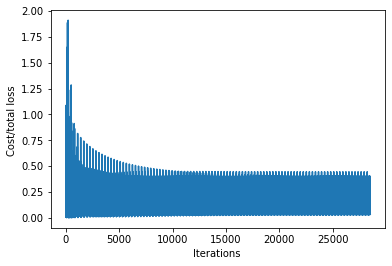

In [104]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [105]:
model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()

array([[ 0.67],
       [ 0.09],
       [ 0.34],
       [ 0.28],
       [ 0.51],
       [ 0.31],
       [ 0.15],
       [ 0.28],
       [ 0.21],
       [ 0.58],
       [ 0.3 ],
       [ 0.72],
       [ 0.6 ],
       [ 0.3 ],
       [ 0.64],
       [ 0.14],
       [ 0.4 ],
       [ 0.26],
       [ 0.56],
       [ 0.22],
       [ 0.18],
       [ 0.28],
       [ 0.23],
       [ 0.25],
       [ 0.23],
       [ 0.56],
       [ 0.66],
       [ 0.33],
       [ 0.26],
       [ 0.51],
       [ 0.43],
       [ 0.22],
       [ 0.58],
       [ 0.53],
       [ 0.22],
       [ 0.53],
       [ 0.72],
       [ 0.29],
       [ 0.27],
       [ 0.65],
       [ 0.66],
       [ 0.19],
       [ 0.83],
       [ 0.83],
       [ 0.31],
       [ 0.72],
       [ 0.43],
       [ 0.39],
       [ 0.3 ],
       [ 0.31],
       [ 0.41],
       [ 0.29],
       [ 0.21],
       [ 0.56],
       [ 0.33],
       [ 0.31],
       [ 0.3 ],
       [ 0.72],
       [ 0.42],
       [ 0.43],
       [ 0.32],
       [ 0.78],
       [

In [106]:
print(accuracy_score(y_test,a))

NameError: name 'a' is not defined

In [ ]:
model(torch.tensor(X_test, dtype=torch.float32))#.detach().numpy().ravel()

In [ ]:
a=model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().ravel()

In [107]:
for i in np.linspace(0, 1 , 100):
    a=model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().ravel()
    a=(a>i)*1
    print("when p:{} ,R2: {}".format(i,accuracy_score(y_test,a)))

when p:0.0 ,R2: 0.3986013986013986
when p:0.010101010101010102 ,R2: 0.3986013986013986
when p:0.020202020202020204 ,R2: 0.3986013986013986
when p:0.030303030303030304 ,R2: 0.3986013986013986
when p:0.04040404040404041 ,R2: 0.3986013986013986
when p:0.05050505050505051 ,R2: 0.3986013986013986
when p:0.06060606060606061 ,R2: 0.3986013986013986
when p:0.07070707070707072 ,R2: 0.3986013986013986
when p:0.08080808080808081 ,R2: 0.3986013986013986
when p:0.09090909090909091 ,R2: 0.40559440559440557
when p:0.10101010101010102 ,R2: 0.40559440559440557
when p:0.11111111111111112 ,R2: 0.40559440559440557
when p:0.12121212121212122 ,R2: 0.40559440559440557
when p:0.13131313131313133 ,R2: 0.4125874125874126
when p:0.14141414141414144 ,R2: 0.4125874125874126
when p:0.15151515151515152 ,R2: 0.4195804195804196
when p:0.16161616161616163 ,R2: 0.42657342657342656
when p:0.17171717171717174 ,R2: 0.43356643356643354
when p:0.18181818181818182 ,R2: 0.4405594405594406
when p:0.19191919191919193 ,R2: 0.4475

In [ ]:
(a<0.4)*1

# Logistic Regression with Pytorch

In [ ]:

import torch.nn as nn
import torch
import matplotlib.pyplot as plt 

In [ ]:
x = torch.tensor(X_train, dtype=torch.float32) 
y = torch.tensor(y_train, dtype=torch.float32) 

In [265]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.tensor(X_train, dtype=torch.float32) 
        self.y = torch.tensor(y_train, dtype=torch.float32) 
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [266]:
data_set = Data2D()
Data2D()[0][1]

tensor(1.)

In [ ]:
# Create the linear regression model and print the parameters
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [ ]:
model = logistic_regression(11)
print("The parameters: ", list(model.parameters()))

In [ ]:
# Create the optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

In [ ]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

In [ ]:
# Train the model

LOSS = []
print("Before Training: ")
epochs = 100


def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


In [209]:
train_model(100)

RuntimeError: size mismatch, m1: [5 x 11], m2: [5 x 5] at /tmp/pip-req-build-9oilk29k/aten/src/TH/generic/THTensorMath.cpp:197

In [ ]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [ ]:
a=model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().ravel()
a=np.round(a)
print(accuracy_score(y_test,a))

# Deep Learning

In [108]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

In [109]:
# Calculate the accuracy

def accuracy(model, data_set):
    return np.mean(data_set.y.view(-1).numpy() == (model(data_set.x)[:, 0] > 0.5).numpy())

In [324]:
# Define the class Net with one hidden layer 

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        #hidden layer 
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        #output layer 
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = torch.sigmoid(self.linear3(x))
        return x

In [325]:
x = torch.tensor(X_train, dtype=torch.float32) 
y = torch.tensor(y_train, dtype=torch.float32) 

In [326]:
# Define the train model

def train(data_set, model, criterion, train_loader, optimizer, epochs=5):
    COST = []
    ACC = []
    for epoch in range(epochs):
        total=0
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            #cumulative loss 
            total+=loss.item()
        ACC.append(accuracy(model, data_set))
        COST.append(total)
        
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()

    return COST

In [327]:
model = Net(11,10,10,1)

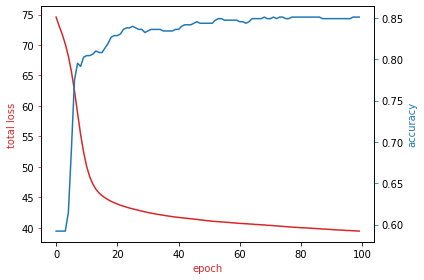

In [328]:
# Train the model

learning_rate = .01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=5)
LOSS12 = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

In [317]:
a=model.forward(torch.tensor(X_test, dtype=torch.float32)).detach().numpy().ravel()
a=np.round(a+0.092)
print(accuracy_score(y_test,a))

0.837037037037037


In [51]:
df2["ChipTime"]=pd.to_datetime(df2.ChipTime, unit="hour").dt.strftime('%H:%M:%S')

NameError: name 'df2' is not defined

In [52]:
pd.ChipTime

AttributeError: module 'pandas' has no attribute 'ChipTime'

In [108]:
Earns1=[10,20,10]
Earns2=[10,20,20]
Earns3=[30,30,30]
df = pd.DataFrame({'Earns1':Earns1,'Earns2':Earns2,'Earns3':Earns3})
df

,Earns1,Earns2,Earns3
0,10,10,30
1,20,20,30
2,10,20,30


In [109]:
df=df.to_numpy().transpose().reshape(df.size,order='C')

In [110]:
print('result: {} (mean of {})'.format(df.mean(),list(df)))

result: 20.0 (mean of [10, 20, 10, 10, 20, 20, 30, 30, 30])


<h2 id="evaluation">1. Introduction</h2>